In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
# Loading the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:

# Dropping the target column as this is a clustering problem
print(f"Original dataset shape: {data.shape}")
data.head()

Original dataset shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=3, random_state=42)

In [11]:
# Adding cluster labels to the dataset
data['Cluster'] = kmeans.labels_

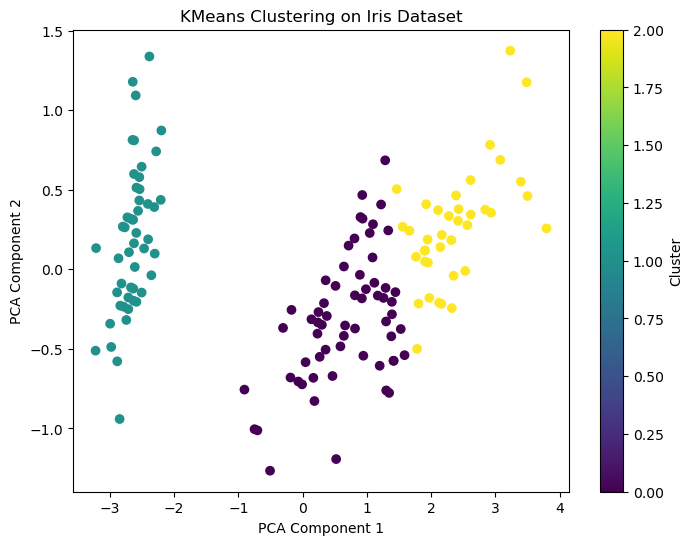

In [13]:
# Visualizing clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.iloc[:, :-1])
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [17]:
# Applying Hierarchical Clustering
linkage_matrix = linkage(data.iloc[:, :-1], method='ward')

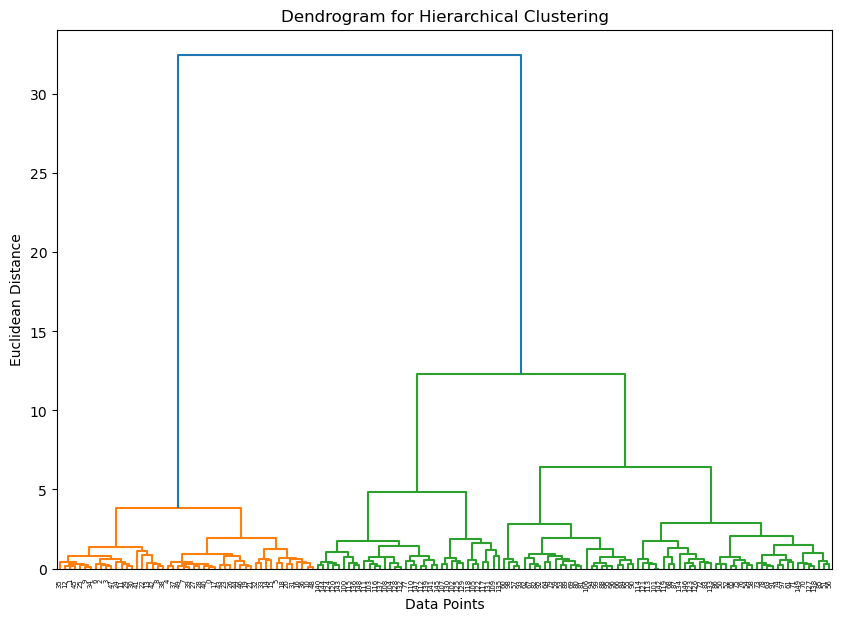

In [19]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [21]:
# Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data.iloc[:, :-2])

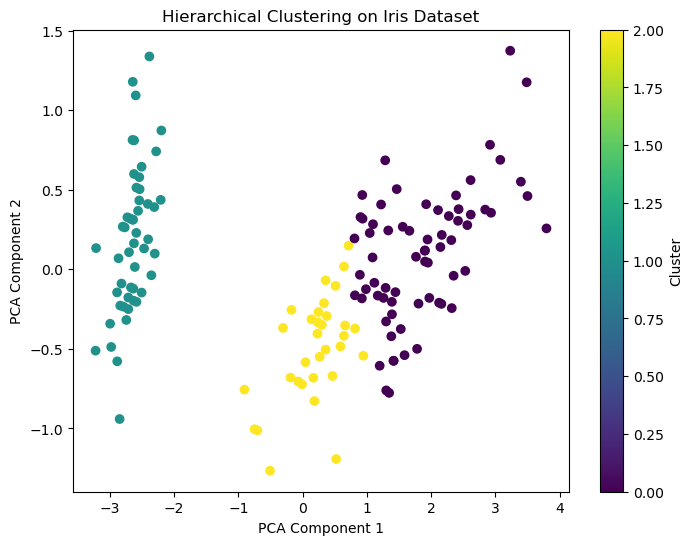

In [23]:
# Visualizing clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis', marker='o')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()